### Model

In [1]:
import torch
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.optim as optim

from model import Generator, Discriminator
from utils import AnimeDataset, load_checkpoint, train
from eval import load_loss, update_loss, plot_loss_curve, \
    visualize_model, generate_images, inception_score

## Hyperparameters

In [4]:
# Number of channels (RGB -> 3)
nc = 3
# Size of z latent vector
nz = 128
# Size of feature maps in generator
ngf = 64
# Size of feature maps in discriminator
ndf = 64

device = 'cuda' if torch.cuda.is_available() else 'cpu'
netG = Generator(nz, ngf, nc).to(device)
netD = Discriminator(nc, ndf).to(device)

learning_rate = 0.00001
optimizerD = optim.RMSprop(netD.parameters(), lr=learning_rate)
optimizerG = optim.RMSprop(netG.parameters(), lr=learning_rate)

batch_size = 256

checkpoint_dir = './exp'
loss_dir = './'
data_dir = './Anime_Dataset/Anime_Dataset'
imgs_dir = './output'

## Data Loading

In [6]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [7]:
dataset = AnimeDataset(image_folder=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, 
                        num_workers=64, prefetch_factor=3)

In [8]:
dataloader.num_workers, dataloader.batch_size

(32, 256)

## Training

In [14]:
# Load previous checkpoint
load_checkpoint(netG, netD, optimizerG, optimizerD, '128_checkpoint_epoch_9500.pth.tar')

(5.207005977630615, -11.010955810546875)

In [ ]:
lossD, lossG = train(netD, netG, dataloader=dataloader, 
                     nz=nz, device=device,
                     optimizerD=optimizerD,
                     optimizerG=optimizerG, 
                     num_epochs=2500, 
                     imgs_dir=imgs_dir,n_critic=1)

In [15]:
lossD, lossG = train(netD, netG, dataloader=dataloader, 
                     nz=nz, device=device,
                     optimizerD=optimizerD,
                     optimizerG=optimizerG, 
                     num_epochs=1000, 
                     imgs_dir=imgs_dir,n_critic=1)

[0/500] Loss_D: -10.5866 Loss_G: 8.0925
[1/500] Loss_D: -13.0620 Loss_G: -16.0301
[2/500] Loss_D: -11.8605 Loss_G: 2.1385
[3/500] Loss_D: -11.0097 Loss_G: -3.7993
[4/500] Loss_D: -9.8749 Loss_G: -3.9739
[5/500] Loss_D: -12.0168 Loss_G: -9.4719
[6/500] Loss_D: -10.4620 Loss_G: -4.9364
[7/500] Loss_D: -10.7130 Loss_G: -1.5190
[8/500] Loss_D: -12.1964 Loss_G: -26.5749
[9/500] Loss_D: -10.6443 Loss_G: -32.9477
[10/500] Loss_D: -10.9098 Loss_G: -4.8585
[11/500] Loss_D: -12.4557 Loss_G: -0.0587
[12/500] Loss_D: -10.9811 Loss_G: 8.4675
[13/500] Loss_D: -9.7289 Loss_G: -4.7824
[14/500] Loss_D: -11.1476 Loss_G: 1.4522
[15/500] Loss_D: -12.3699 Loss_G: 15.4609
[16/500] Loss_D: -11.4884 Loss_G: -9.3436
[17/500] Loss_D: -12.5279 Loss_G: 13.6184
[18/500] Loss_D: -12.4512 Loss_G: -24.8167
[19/500] Loss_D: -12.2386 Loss_G: 6.9876
[20/500] Loss_D: -10.2195 Loss_G: 0.9662
[21/500] Loss_D: -10.2036 Loss_G: -12.9179
[22/500] Loss_D: -13.6643 Loss_G: 15.4146
[23/500] Loss_D: -13.7749 Loss_G: 35.4771
[24/5

[194/500] Loss_D: -13.4204 Loss_G: 18.4503
[195/500] Loss_D: -12.2468 Loss_G: 19.9172
[196/500] Loss_D: -12.6941 Loss_G: -20.6254
[197/500] Loss_D: -11.9809 Loss_G: 15.0999
[198/500] Loss_D: -11.5944 Loss_G: 5.6491
[199/500] Loss_D: -11.4842 Loss_G: -16.8712
[200/500] Loss_D: -11.5729 Loss_G: 8.9115
[201/500] Loss_D: -10.5507 Loss_G: -16.2483
[202/500] Loss_D: -12.9107 Loss_G: 9.4264
[203/500] Loss_D: -12.9124 Loss_G: 15.3349
[204/500] Loss_D: -10.4844 Loss_G: -2.4168
[205/500] Loss_D: -10.7585 Loss_G: -1.0098
[206/500] Loss_D: -10.8425 Loss_G: -2.7715
[207/500] Loss_D: -10.5450 Loss_G: -4.3375
[208/500] Loss_D: -11.4560 Loss_G: 9.9578
[209/500] Loss_D: -9.9730 Loss_G: -8.5855
[210/500] Loss_D: -11.2273 Loss_G: -8.0737
[211/500] Loss_D: -10.9308 Loss_G: 7.0633
[212/500] Loss_D: -11.4500 Loss_G: 10.3329
[213/500] Loss_D: -10.8568 Loss_G: 0.9807
[214/500] Loss_D: -12.0281 Loss_G: -8.5117
[215/500] Loss_D: -10.8419 Loss_G: 6.1523
[216/500] Loss_D: -10.7289 Loss_G: 7.3490
[217/500] Loss_D:

[385/500] Loss_D: -11.8135 Loss_G: -15.2766
[386/500] Loss_D: -11.5450 Loss_G: 8.6068
[387/500] Loss_D: -11.6387 Loss_G: 11.8594
[388/500] Loss_D: -10.3881 Loss_G: -0.3349
[389/500] Loss_D: -10.4627 Loss_G: -1.0843
[390/500] Loss_D: -10.2562 Loss_G: -14.4518
[391/500] Loss_D: -10.1371 Loss_G: 4.0436
[392/500] Loss_D: -9.5717 Loss_G: -2.3650
[393/500] Loss_D: -10.1910 Loss_G: 6.4967
[394/500] Loss_D: -10.6889 Loss_G: -2.2958
[395/500] Loss_D: -13.7580 Loss_G: 5.1055
[396/500] Loss_D: -10.6614 Loss_G: 7.3936
[397/500] Loss_D: -11.7811 Loss_G: 21.8140
[398/500] Loss_D: -10.0515 Loss_G: 1.3812
[399/500] Loss_D: -11.4617 Loss_G: -9.5186
[400/500] Loss_D: -10.8229 Loss_G: -11.7378
[401/500] Loss_D: -11.5154 Loss_G: -1.6586
[402/500] Loss_D: -9.7457 Loss_G: -3.0153
[403/500] Loss_D: -13.0320 Loss_G: 4.9320
[404/500] Loss_D: -11.7658 Loss_G: 5.2440
[405/500] Loss_D: -11.1484 Loss_G: 1.2572
[406/500] Loss_D: -11.6621 Loss_G: 24.0047
[407/500] Loss_D: -12.5865 Loss_G: 7.0493
[408/500] Loss_D: -1

## Loss Visualization and Processing

In [17]:
update_loss(lossD, lossG, loss_dir, 'complete', 'complete')

In [ ]:
lossD, lossG = load_loss(loss_dir, 'complete')

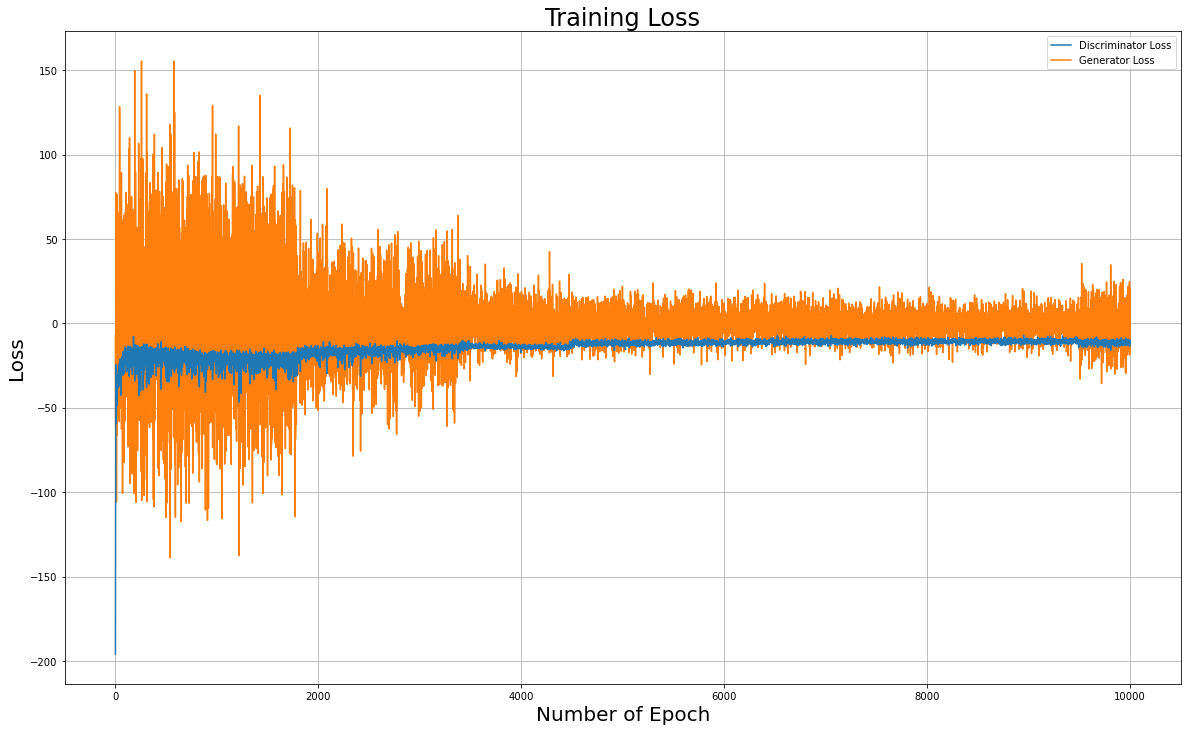

In [38]:
plot_loss_curve(lossD, lossG)

## Sampling

In [6]:
# Load model if making inference at first
load_checkpoint(netG, netD, optimizerG, optimizerD, '128_checkpoint_epoch_3500.pth.tar')

(8.395936965942383, -15.085253715515137)

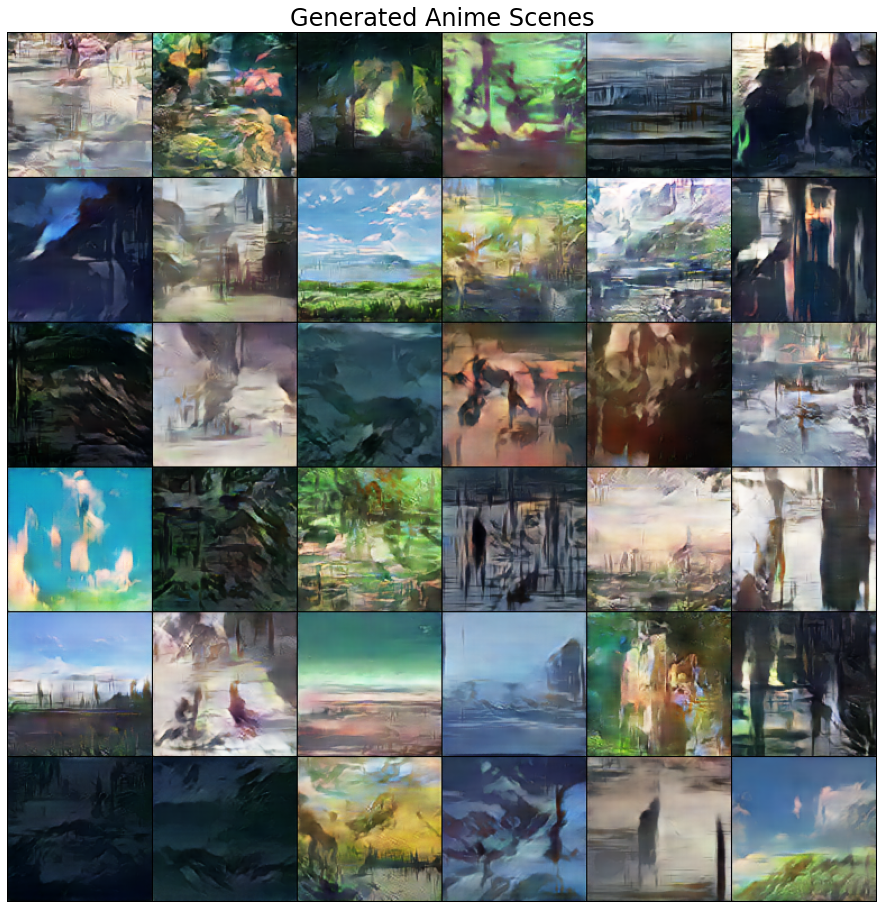

In [32]:
visualize_model(netG, nz, device)

## Evaluation

In [8]:
path = './eval/'
generate_images(netG, nz, 1000, device, path)

In [10]:
transform = transforms.Compose([
    transforms.Resize((299, 299), interpolation=Image.LANCZOS),  # upsample to 299x299
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

eval_set = AnimeDataset(image_folder=path, transform=transform)
eval_loader = DataLoader(eval_set, batch_size=32, shuffle=False, num_workers=32)

In [25]:
load_checkpoint(netG, netD, optimizerG, optimizerD, '128_checkpoint_epoch_10000.pth.tar')

(20.698148727416992, -13.483027458190918)

In [26]:
generate_images(1000)

In [27]:
mean, std = inception_score(eval_loader, cuda=True, batch_size=32, splits=10)
print(f"Inception Score: {mean} ± {std}")

Inception Score: 3.020332332344092 ± 0.23177706748839272


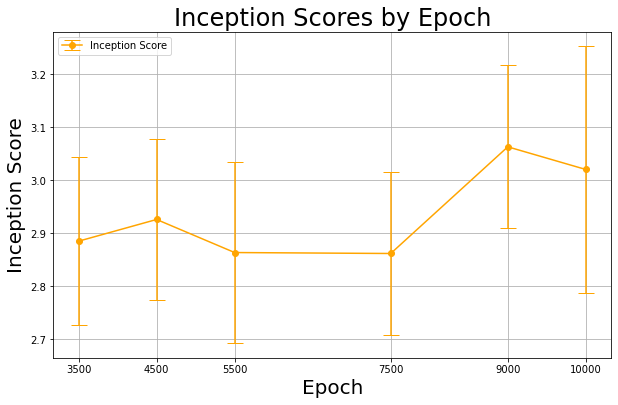

In [30]:
import matplotlib.pyplot as plt

# Data
epochs = [3500, 4500, 5500, 7500, 9000, 10000]
inception_means = [2.8852, 2.9261, 2.8638, 2.8620, 3.0630, 3.0203]
inception_stds = [0.1582, 0.1521, 0.1704, 0.1540, 0.1535, 0.2318]

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(epochs, inception_means, yerr=inception_stds, fmt='o-', capsize=8, label='Inception Score', color='orange')

plt.title('Inception Scores by Epoch', fontsize=24)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Inception Score', fontsize=20)
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()